<center><img src='./Figs/cs-logo.png' width=200></center>



<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>eXplainable AI: Glassbox models - An introduction to Linear models, GLMs and GAMS</center>
<hr style=" border:none; height:3px;">
</h1>
Taken from the Harvard CS109b course.

In the Lab, we will use the [`diabetes`](./Data/diabetes.csv) dataset. 

Variables are:
- subject:   subject ID number
- age:       age diagnosed with diabetes
- acidity:   a measure of acidity called base deficit


The Response is:
- y:         natural log of serum C-peptide concentration

In [3]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline 

## Data loading and exploration

First, you have to load and read the data.

In [4]:
import pandas as pd

diab = pd.read_csv("./data/diabetes.csv")
diab.head()


,subject,age,acidity,y
0,1,5.2,-8.1,4.8
1,2,8.8,-16.1,4.1
2,3,10.5,-0.9,5.2
3,4,10.6,-7.8,5.5
4,5,10.4,-29.0,5.0


Here, you have to take inspiration from the example of the Bike Sharing notebook in order to check the dataset content and the data quality.

In [6]:
# Checking dataset Shape
diab.shape

(43, 4)

In [7]:
# Checking Columns Data Types
diab.dtypes


subject      int64
age        float64
acidity    float64
y          float64
dtype: object

In [8]:
# Dataset description (using the pandas describe function)
diab.describe()

,subject,age,acidity,y
count,43.000000,43.000000,43.000000,43.000000
mean,22.000000,9.032558,-8.148837,4.746512
std,12.556539,4.022539,7.123080,0.720565
min,1.000000,0.900000,-29.000000,3.000000
25%,11.500000,5.500000,-12.700000,4.450000
50%,22.000000,10.400000,-7.800000,4.900000
75%,32.500000,11.850000,-2.000000,5.100000
max,43.000000,15.600000,-0.200000,6.600000


In [12]:
# Checking the % of null values in each column

diab.isna().sum()

subject    0
age        0
acidity    0
y          0
dtype: int64

## Visualizing the data


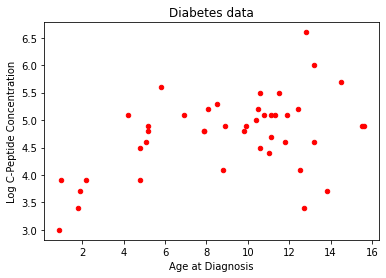

In [13]:
# Checking linear relationship between the y variable and other numeric variables (acidity and age)


ax0 = diab.plot.scatter(x='age',y='y',c='Red',title="Diabetes data") #plotting direclty from pandas!
ax0.set_xlabel("Age at Diagnosis")
ax0.set_ylabel("Log C-Peptide Concentration");

## Linear/Polynomial regression with statsmodels.

We have two tools for Linear Regression:

 + [statsmodels](https://www.statsmodels.org/stable/regression.html), and
 + [sklearn](https://scikit-learn.org/stable/index.html)
 
As in the Bike Sharing notebook, we will use both of these tools for this Lab. In particular, here, it is asked to build a linear model of y according to the age variable.


In [14]:
import statsmodels.formula.api as sm
# learn a linear model for 'y ~ age' usinf statsmodels

model1 = sm.ols('y ~ age',data=diab)
fit1_lm = model1.fit()


Here we build a dataframe to predict values on

In [15]:
x_pred = np.linspace(0,16,100)

predict_df = pd.DataFrame(data={"age":x_pred})
predict_df.head()

,age
0,0.000000
1,0.161616
2,0.323232
3,0.484848
4,0.646465


Use `get_prediction(<data>).summary_frame()` to get the model's prediction (and error bars!)

In [16]:
prediction_output = fit1_lm.get_prediction(predict_df).summary_frame()
prediction_output.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.996031,0.244590,3.502071,4.489991,2.600828,5.391235
1,4.009459,0.240929,3.522892,4.496026,2.616856,5.402063
2,4.022887,0.237280,3.543691,4.502084,2.632842,5.412932
3,4.036315,0.233642,3.564466,4.508165,2.648786,5.423845
4,4.049743,0.230016,3.585216,4.514270,2.664687,5.434800


Plot the model and error bars

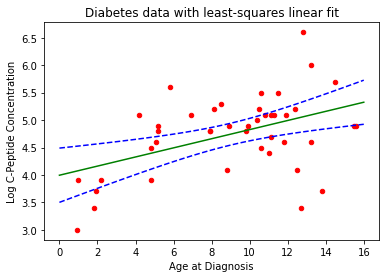

In [17]:
ax1 = diab.plot.scatter(x='age',y='y',c='Red',title="Diabetes data with least-squares linear fit")
ax1.set_xlabel("Age at Diagnosis")
ax1.set_ylabel("Log C-Peptide Concentration")

ax1.plot(predict_df.age, prediction_output['mean'],color="green")
ax1.plot(predict_df.age, prediction_output['mean_ci_lower'], color="blue",linestyle="dashed")
ax1.plot(predict_df.age, prediction_output['mean_ci_upper'], color="blue",linestyle="dashed");

<div class="exercise"><b>Exercise 1</b></div>

- Fit a 3rd degree polynomial model and
- plot the model+error bars.

You can either take 
- **Route1**: Build a design df with a column for each of `age`, `age**2`, `age**3`, or 
- **Route2**: Just edit the formula

In [18]:
fit2_lm = sm.ols(formula="y ~ age + np.power(age, 2) + np.power(age, 3)",data=diab).fit()

poly_predictions = fit2_lm.get_prediction(predict_df).summary_frame()
poly_predictions.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.740481,0.508197,1.712556,3.768406,1.156238,4.324724
1,2.846265,0.472858,1.889819,3.802710,1.307439,4.385090
2,2.948751,0.439558,2.059661,3.837841,1.450860,4.446641
3,3.047990,0.408303,2.222119,3.873860,1.586737,4.509242
4,3.144031,0.379104,2.377221,3.910841,1.715328,4.572735


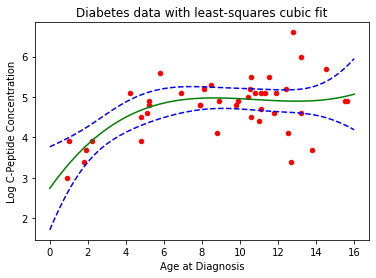

In [19]:
ax2 = diab.plot.scatter(x='age',y='y',c='Red',title="Diabetes data with least-squares cubic fit")
ax2.set_xlabel("Age at Diagnosis")
ax2.set_ylabel("Log C-Peptide Concentration")

ax2.plot(predict_df.age, poly_predictions['mean'],color="green")
ax2.plot(predict_df.age, poly_predictions['mean_ci_lower'], color="blue",linestyle="dashed")
ax2.plot(predict_df.age, poly_predictions['mean_ci_upper'], color="blue",linestyle="dashed");

##  Piecewise Polynomials a.k.a. Splines

Splines are a type of piecewise polynomial interpolant. A spline of degree k is a piecewise polynomial that is continuously differentiable k − 1 times. 

![](./figs/epsilon.png)
If the degree is 1 then we have a Linear Spline. If it is 3 then we have a Cubic spline. It turns out that cubic splines because they have a continous 2nd derivative at the knots are very smoothly looking to the eye. We do not need higher order than that. The Cubic Splines are usually Natural Cubic Splines which means they have the added constrain of the end points' second derivative = 0.

We will use the CubicSpline and the B-Spline as well as the Linear Spline.

#### scipy.interpolate

See all the different splines that scipy.interpolate has to offer: https://docs.scipy.org/doc/scipy/reference/interpolate.html

Let's use the simplest form which is interpolate on a set of points and then find the points between them

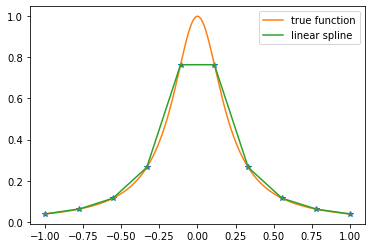

In [20]:
from scipy.interpolate import splrep, splev
from scipy.interpolate import BSpline, CubicSpline
from scipy.interpolate import interp1d

# define the range of the function
a = -1
b = 1

# define the number of knots 
num_knots = 10
x = np.linspace(a,b,num_knots)

# define the function we want to approximate
y = 1/(1+25*(x**2))

# make a linear spline
linspline = interp1d(x, y)

# sample at these points to plot
xx = np.linspace(a,b,1000)
yy = 1/(1+25*(xx**2))
plt.plot(x,y,'*')
plt.plot(xx, yy, label='true function')
plt.plot(xx, linspline(xx), label='linear spline');
plt.legend();

<div class="exercise"><b>Exercise 2</b></div>

The Linear interpolation does not look very good. Fit a Cubic Spline and plot along the Linear to compare.

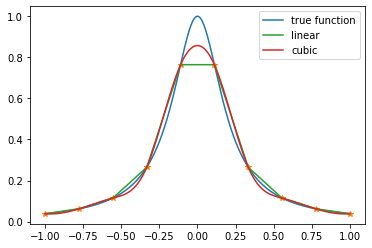

In [21]:
# define the range of the function
a = -1
b = 1

# define the knots 
num_knots = 10
x = np.linspace(a,b,num_knots)

# define the function we want to approximate
y = 1/(1+25*(x**2))

# make the Cubic spline
cubspline = CubicSpline(x, y)

# OR make a linear spline
linspline = interp1d(x, y)

# plot
xx = np.linspace(a,b,1000)
yy = 1/(1+25*(xx**2))
plt.plot(xx, yy, label='true function')
plt.plot(x,y,'*')
plt.plot(xx, linspline(xx), label='linear');
plt.plot(xx, cubspline(xx), label='cubic');
plt.legend();

<div class="discussion"><b>Discussion</b></div>

- Change the number of knots to 100 and see what happens. What would happen if we run a polynomial model of degree equal to the number of knots (a global one as in polynomial regression, not a spline)?
- What makes a spline 'Natural'?

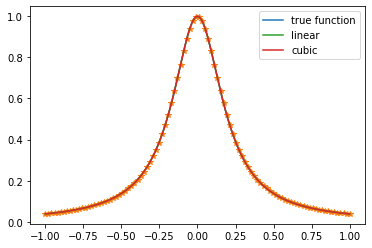

In [22]:
# define the range of the function
a = -1
b = 1

# define the knots 
num_knots = 100
x = np.linspace(a,b,num_knots)

# define the function we want to approximate
y = 1/(1+25*(x**2))

# make the Cubic spline
cubspline = CubicSpline(x, y)

# OR make a linear spline
linspline = interp1d(x, y)

# plot
xx = np.linspace(a,b,1000)
yy = 1/(1+25*(xx**2))
plt.plot(xx, yy, label='true function')
plt.plot(x,y,'*')
plt.plot(xx, linspline(xx), label='linear');
plt.plot(xx, cubspline(xx), label='cubic');
plt.legend();

#### B-Splines

A B-splines (Basis Splines) is defined by a set of **control points** and a set of **basis functions** that intepolate (fit) the function between these points. By choosing to have no smoothing factor we forces the final B-spline to pass though all the points. If, on the other hand, we set a smothing factor, our function is more of an approximation with the control points as "guidance". The latter produced a smoother curve which is prefferable for drawing software. For more on Splines see:  https://en.wikipedia.org/wiki/B-spline)

![](./figs/B-spline.png)

We will use [`scipy.splrep`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep) to calulate the coefficients for the B-Spline and draw it. 

#### B-Spline with no smooting

[ 0.          0.          0.          0.          2.22222222  3.33333333
  4.44444444  5.55555556  6.66666667  7.77777778 10.         10.
 10.         10.        ] [-4.94881722e-18  8.96543619e-01  1.39407154e+00 -2.36640266e-01
 -1.18324030e+00 -8.16301228e-01  4.57836125e-01  1.48720677e+00
  1.64338775e-01 -5.44021111e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00] 3


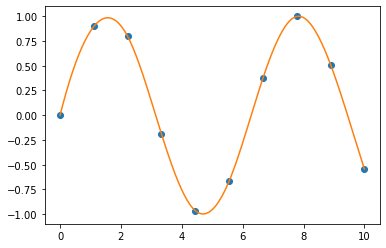

In [23]:
from scipy.interpolate import splev, splrep
x = np.linspace(0, 10, 10)
y = np.sin(x)

t,c,k = splrep(x, y) # (tck) is a tuple containing the vector of knots, coefficients, degree of the spline
print(t,c,k)
# define the points to plot on (x2)
x2 = np.linspace(0, 10, 200)
y2 = BSpline(t, c, k)
plt.plot(x, y, 'o', x2, y2(x2))
plt.show()

#### B-Spline with smooting factor s

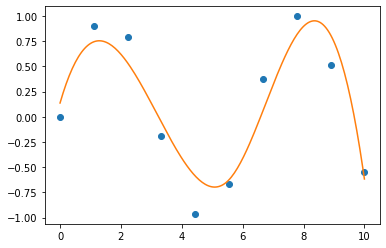

In [24]:
from scipy.interpolate import splev, splrep
x = np.linspace(0, 10, 10)
y = np.sin(x)

s = 0.5 # add smooting factor
task = 0 # task needs to be set to 0, which represents:
# we are specifying a smoothing factor and thus only want
# splrep() to find the optimal t and c

t,c,k = splrep(x, y, task=task, s=s)

# define the points to plot on (x2)
x2 = np.linspace(0, 10, 200)
y2 = BSpline(t, c, k)
plt.plot(x, y, 'o', x2, y2(x2))
plt.show()

#### B-Spline with given knots

In [25]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
knots = np.quantile(x, [0.25, 0.5, 0.75])
print(knots)

[2.5 5.  7.5]


In [26]:
# calculate the B-Spline
t,c,k = splrep(x, y, t=knots)

In [27]:
curve = BSpline(t,c,k)
curve

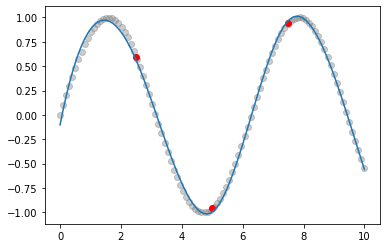

In [28]:
plt.scatter(x=x,y=y,c='grey', alpha=0.4)
yknots = np.sin(knots)
plt.scatter(knots, yknots, c='r')
plt.plot(x,curve(x))
plt.show()

## GAMs

https://readthedocs.org/projects/pygam/downloads/pdf/latest/

#### Classification in `pyGAM`

We consider here multivaiate data, the [`kyphosis`](./Data/kyphosis.csv) dataset, and the `LogisticGAM` model from `pyGAM` to do binary classification.

- kyphosis - wherther a particular deformation was present post-operation
- age - patient's age in months
- number - the number of vertebrae involved in the operation
- start - the number of the topmost vertebrae operated on

In [29]:
!pip install pygam

### Load and explore the data

In [31]:
kyphosis = pd.read_csv("./data/kyphosis.csv")

display(kyphosis.head())
display(kyphosis.describe(include='all'))
display(kyphosis.dtypes)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


,Kyphosis,Age,Number,Start
count,81,81.000000,81.000000,81.000000
unique,2,NaN,NaN,NaN
top,absent,NaN,NaN,NaN
freq,64,NaN,NaN,NaN
mean,NaN,83.654321,4.049383,11.493827
std,NaN,58.104251,1.619423,4.883962
min,NaN,1.000000,2.000000,1.000000
25%,NaN,26.000000,3.000000,9.000000
50%,NaN,87.000000,4.000000,13.000000
75%,NaN,130.000000,5.000000,16.000000


Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

Convert the outcome in a binary form, 1 or 0

In [33]:
kyphosis = pd.read_csv("./data/kyphosis.csv")
kyphosis["outcome"] = 1*(kyphosis["Kyphosis"] == "present")
kyphosis.describe()

,Age,Number,Start,outcome
count,81.000000,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827,0.209877
std,58.104251,1.619423,4.883962,0.409758
min,1.000000,2.000000,1.000000,0.000000
25%,26.000000,3.000000,9.000000,0.000000
50%,87.000000,4.000000,13.000000,0.000000
75%,130.000000,5.000000,16.000000,0.000000
max,206.000000,10.000000,18.000000,1.000000


Learn a LogisticGam on the data (without training and testing dataset)

In [34]:
from pygam import LogisticGAM, s, f, l

X = kyphosis[["Age","Number","Start"]]
y = kyphosis["outcome"]
kyph_gam = LogisticGAM().fit(X,y)

#### Outcome dependence on features

To help us see how the outcome depends on each feature, `pyGAM` has the `partial_dependence()` function.
```
 pdep, confi = kyph_gam.partial_dependence(term=i, X=XX, width=0.95)
```
For more on this see the : https://pygam.readthedocs.io/en/latest/api/logisticgam.html

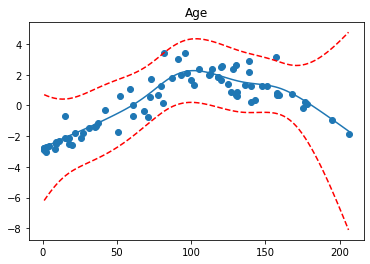

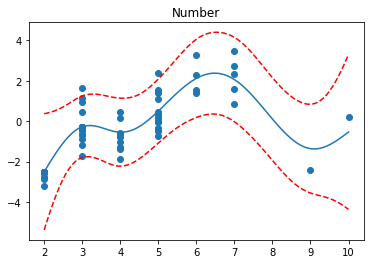

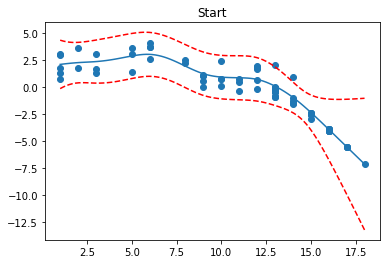

In [35]:
res = kyph_gam.deviance_residuals(X,y)
for i, term in enumerate(kyph_gam.terms):
    if term.isintercept:
        continue

    XX = kyph_gam.generate_X_grid(term=i)
    pdep, confi = kyph_gam.partial_dependence(term=i, X=XX, width=0.95)
    pdep2, _ = kyph_gam.partial_dependence(term=i, X=X, width=0.95)
    plt.figure()
    plt.scatter(X.iloc[:,term.feature], pdep2 + res)
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(X.columns.values[term.feature])
    plt.show()

Notice that we did not specify the basis functions in the .fit(). Cool. `pyGAM` figures them out for us by using $s()$ (splines) for numerical variables and $f()$ for categorical features. If this is not what we want we can manually specify the basis functions, as follows: 

In [36]:
kyph_gam = LogisticGAM(s(0)+s(1)+s(2)).fit(X,y)

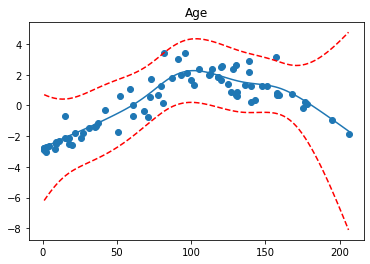

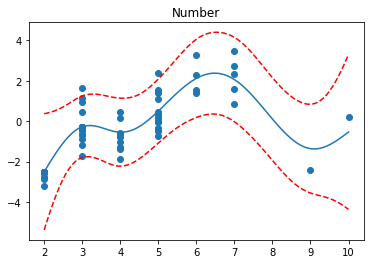

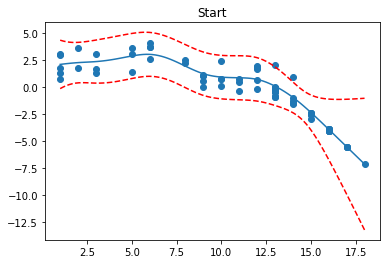

In [37]:
res = kyph_gam.deviance_residuals(X,y)
for i, term in enumerate(kyph_gam.terms):
    if term.isintercept:
        continue

    XX = kyph_gam.generate_X_grid(term=i)
    pdep, confi = kyph_gam.partial_dependence(term=i, X=XX, width=0.95)
    pdep2, _ = kyph_gam.partial_dependence(term=i, X=X, width=0.95)
    plt.figure()
    plt.scatter(X.iloc[:,term.feature], pdep2 + res)
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(X.columns.values[term.feature])
    plt.show()

#### The `wages` dataset

Let's inspect another dataset that is included in `pyGAM` that notes the wages of people based on their age, year of employment and education.

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<Figure size 432x288 with 0 Axes>

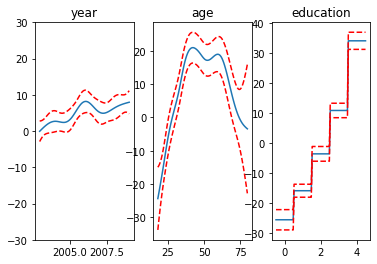

In [38]:
# from the pyGAM documentation
from pygam import LinearGAM, s, f
from pygam.datasets import wage

X, y = wage(return_X_y=True)

## model
gam = LinearGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y)


## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

<div class="discussion"><b>Discussion</b></div>

What are your observations from the plots above?

### Smoothing Splines using pyGAM

For clarity: this is the fancy spline model that minimizes $MSE - \lambda\cdot\text{wiggle penalty}$ $=$ $\sum_{i=1}^N \left(y_i - f(x_i)\right)^2 - \lambda \int \left(f''(x)\right)^2$, across all possible functions $f$. The winner will always be a continuous, cubic polynomial with a knot at each data point.

Let's see how this smoothing works in `pyGAM`. We start by creating some arbitrary data and fitting them with a GAM.

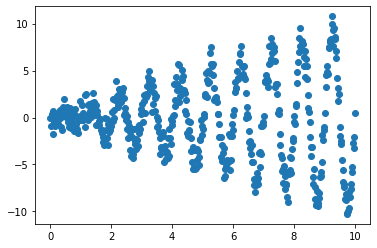

In [39]:
X = np.linspace(0,10,500)
y = np.sin(X*2*np.pi)*X + np.random.randn(len(X))

plt.scatter(X,y);

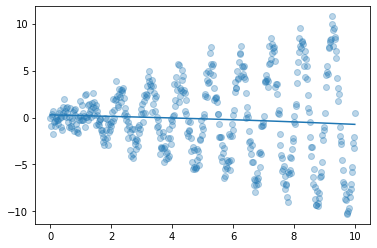

In [40]:
# let's try a large lambda first and lots of splines
gam = LinearGAM(lam=1e6, n_splines=50). fit(X,y)
XX = gam.generate_X_grid(term=0)
plt.scatter(X,y,alpha=0.3);
plt.plot(XX, gam.predict(XX));

We see that the large $\lambda$ forces a straight line, no flexibility. Let's see now what happens if we make it smaller.

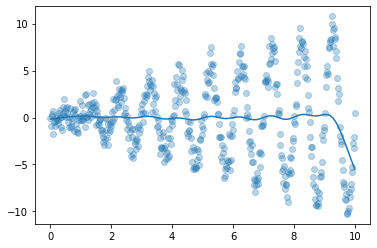

In [41]:
# let's try a smaller lambda 
gam = LinearGAM(lam=1e2, n_splines=50). fit(X,y)
XX = gam.generate_X_grid(term=0)
plt.scatter(X,y,alpha=0.3);
plt.plot(XX, gam.predict(XX));

There is some curvature there but still not a good fit. Let's try no penalty. That should have the line fit exactly.

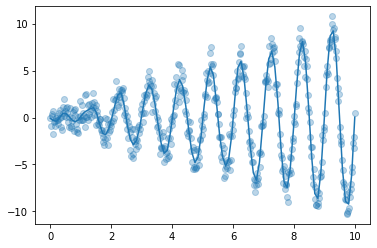

In [42]:
# no penalty, let's try a 0 lambda 
gam = LinearGAM(lam=0, n_splines=50). fit(X,y)
XX = gam.generate_X_grid(term=0)
plt.scatter(X,y,alpha=0.3)
plt.plot(XX, gam.predict(XX))

Yes, that is good. Now let's see what happens if we lessen the number of splines. The fit should not be as good.

In [ ]:
# no penalty, let's try a 0 lambda 
gam = LinearGAM(lam=0, n_splines=10). fit(X,y)
XX = gam.generate_X_grid(term=0)
plt.scatter(X,y,alpha=0.3);
plt.plot(XX, gam.predict(XX));

<div class="exercise"><b>Exercise : your turn on GAMs</b></div>

#### Building interpretable GAMs in Python 

Here, you will work with the [`redwine-quality`]('https://raw.githubusercontent.com/ianshan0915/medium-articles/master/data/redwine-quality.csv') dataset.
Load and examine the data
    

In [52]:
redwine_url = 'https://raw.githubusercontent.com/ianshan0915/medium-articles/master/data/redwine-quality.csv'
redwine = pd.read_csv(redwine_url)

In [53]:
# Data analysis
redwine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [54]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [48]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [50]:
print("Number of unique values in each column:\n")
for i in redwine.columns:
    print(i, len(redwine[i].unique()))

Number of unique values in each column:

fixed acidity 96
volatile acidity 143
citric acid 80
residual sugar 91
chlorides 153
free sulfur dioxide 60
total sulfur dioxide 144
density 436
pH 89
sulphates 96
alcohol 65
quality 6


####  Prepare the data set

In [55]:
redwine_X = redwine.drop(['quality'], axis=1).values
redwine_y = redwine['quality']

####  Build the model via gridsearch

In [56]:
lams = np.random.rand(100, 11)
lams = lams * 11 - 3
lams = np.exp(lams)
print(lams.shape)
gam = LinearGAM(n_splines=10).gridsearch(redwine_X, redwine_y, lam=lams)

  2% (2 of 100) |                        | Elapsed Time: 0:00:00 ETA:   0:00:07

(100, 11)


100% (100 of 100) |######################| Elapsed Time: 0:00:07 Time:  0:00:07


#### Partial dependency plots

<Figure size 432x288 with 0 Axes>

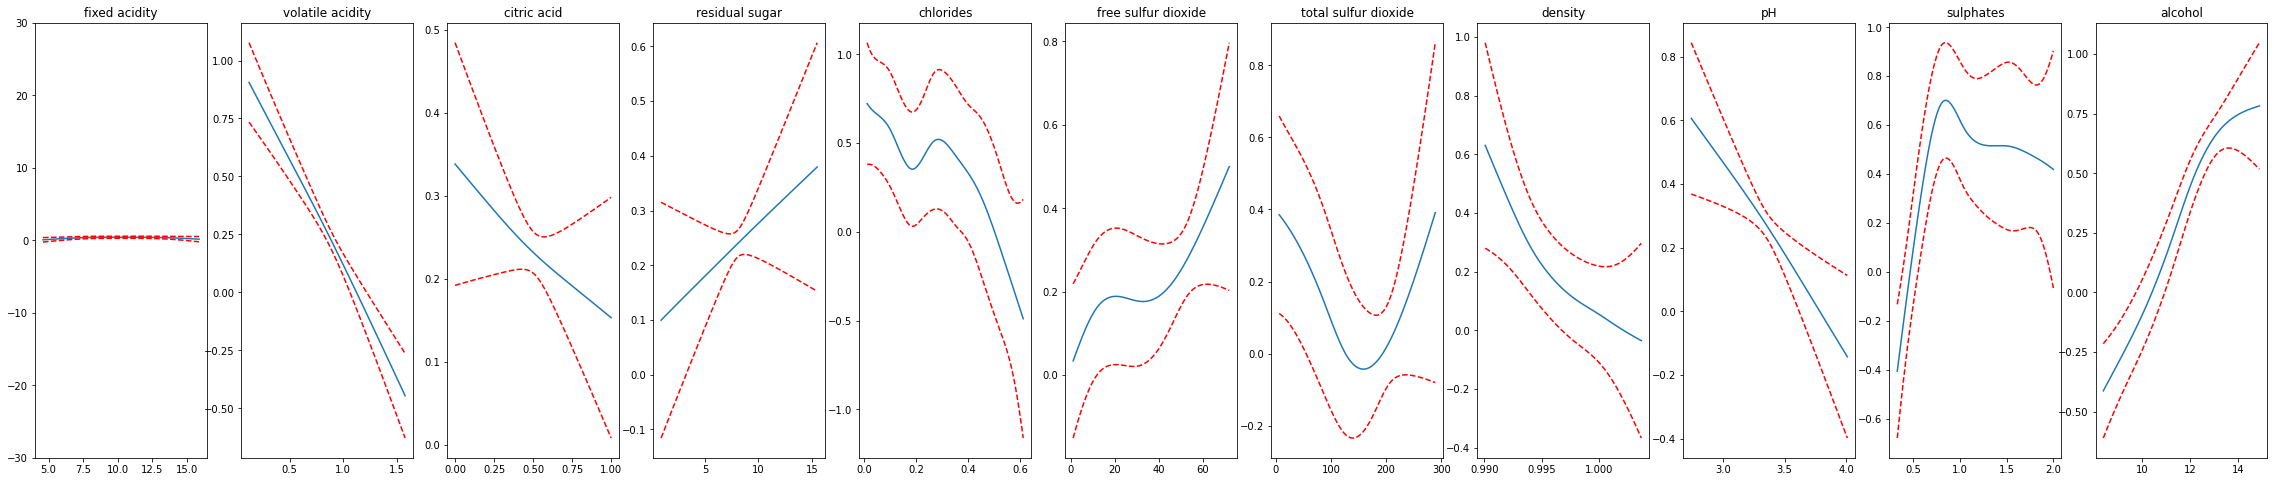

In [57]:
titles = redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,11,figsize=(40, 8))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

#### Discuss and interpret the model.

You can now do the same work for a classification task with the [`tumors`]('https://raw.githubusercontent.com/ianshan0915/medium-articles/master/data/tumors.csv') dataset.

In [58]:
tumors_url = 'https://raw.githubusercontent.com/ianshan0915/medium-articles/master/data/tumors.csv'
tumors = pd.read_csv(tumors_url)

In [59]:
# drop the id column
tumors = tumors.drop(['id'],axis=1)
# encode the diagnosis column
tumors.loc[tumors['diagnosis']=='M','diagnosis'] =1
tumors.loc[tumors['diagnosis']=='B','diagnosis'] =0
tumors_X = tumors.iloc[:,:11].drop(['diagnosis'], axis=1).values
tumors_y = tumors['diagnosis']

In [60]:
log_gam = LogisticGAM(n_splines=10).gridsearch(tumors_X, tumors_y)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/Users/hudelotc/opt/miniconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/Users/hudelotc/opt/miniconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01/Users/hudelotc/opt/miniconda3/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/Users/hudelotc/opt/miniconda3/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 E

In [61]:
log_gam.accuracy(tumors_X, tumors_y)

0.9718804920913884

<Figure size 432x288 with 0 Axes>

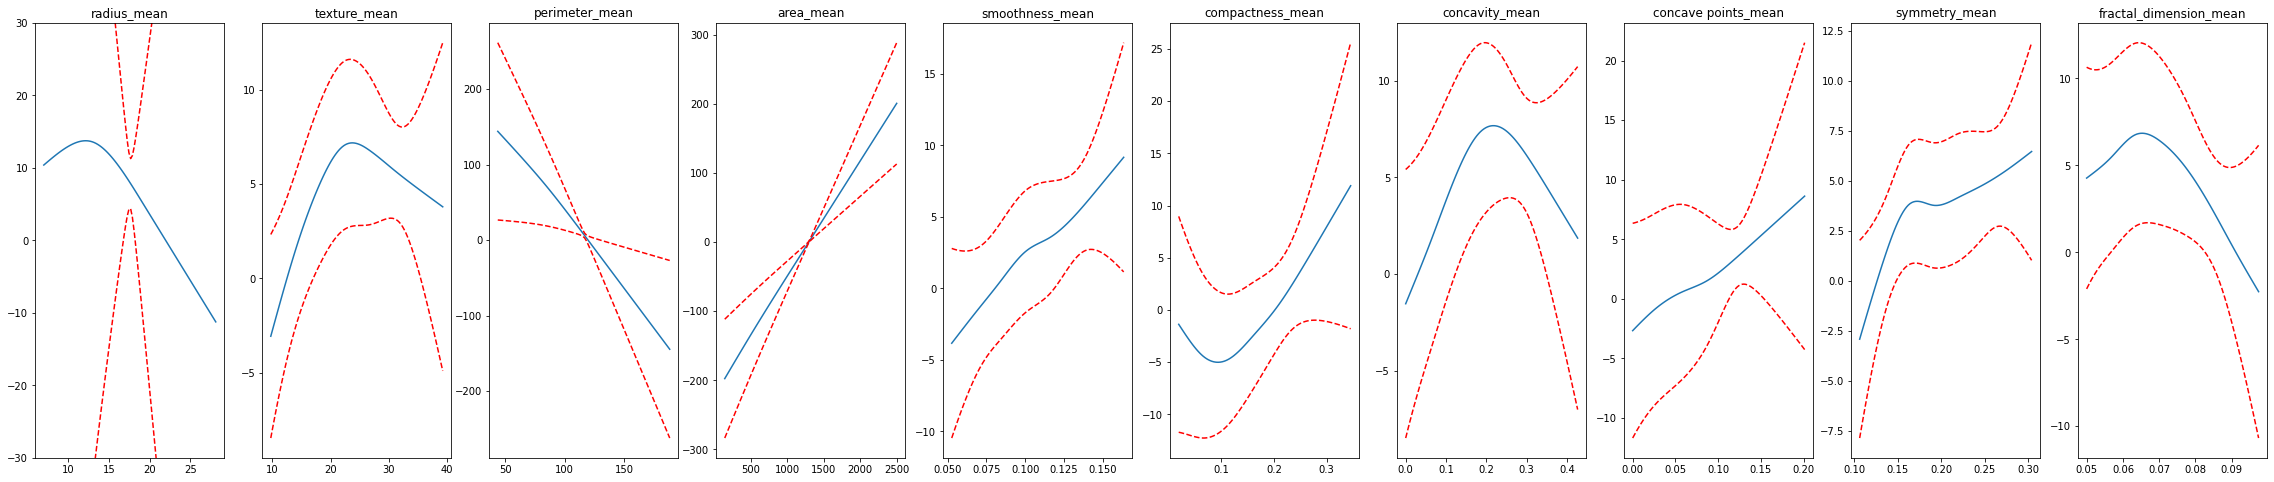

In [62]:
titles = tumors.columns[1:11]
plt.figure()
fig, axs = plt.subplots(1,10,figsize=(40, 8))
for i, ax in enumerate(axs):
    XX = log_gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], log_gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], log_gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])